<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-наличие-дисбаланса" data-toc-modified-id="Проверка-на-наличие-дисбаланса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка на наличие дисбаланса</a></span></li><li><span><a href="#Проверка-моделей-без-учета-дисбаланса." data-toc-modified-id="Проверка-моделей-без-учета-дисбаланса.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка моделей без учета дисбаланса.</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Финальный-вывод" data-toc-modified-id="Финальный-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Финальный вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Обучим разные модели классификации и найдем лучшую.

Построим модель с предельно большим значением *F1*-меры. 

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm
import scipy
import math
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [40]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Посмотрим на информацию, содержащуюся в датасете.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [42]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [44]:
# проверим датасет на наличие пропусков в данных
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце Tenure наблюдается 909 прорусков.
Это менее 10% от данных, удалим эти пропуски.

In [45]:
df = df.dropna()

In [46]:
# проверим все ли сработало корректно
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
#Проверим на дубликаты
df.duplicated().sum()

0

Exited - это целевой признак.

Все остальные столбцы - это признаки, которые влияют на результат классификации.

Посмотрев на основную информацию о признаках, можно сказать, что One-Hot Encoding и масштабирование нужно применить к нескольким признакам.

Дополнительно проверим уникальные значения для категориальных признаков, чтобы убедиться в том, что OHE к ним применять имеет смысл.

In [48]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [49]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

OHE применим к столбцам Gender и Geography, масштабирование - к CreditScore, Balance и EstimatedSalary, так как мы не хотим, чтобы при обучении какой-то признак с более высоким значением был засчитан как более значимый.

In [50]:
# применяем ohe к 2 признакам
df = pd.get_dummies(df, drop_first=True, columns=['Gender', 'Geography'])

In [52]:
# приверим, что получилось
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


Далее разделим датасет на 3 выборки - обучающую, валидационную и тестовую.

Кроме того, удалим признаки Surmane и CustomerId, так как они никак не влияют на качество обучения.

In [53]:
target = df['Exited']
features = df.drop(['Exited', 'Surname', 'CustomerId', 'RowNumber'], axis=1)

# разделяем на обучающую и тестовую выборки (80/20)
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2, 
                                                                            random_state=12345,
                                                                            stratify=target )

# разделяем обучающую выборку на обучающую и валидационную (75/25)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, 
                                                                              target_train, 
                                                                              test_size=0.25, 
                                                                              random_state=12345, 
                                                                              stratify=target_train)

In [54]:
# признаки, которые будем масштабировать
cols_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary']
#Масштабируем численные признаки обучающей выборки
scaler = StandardScaler()
scaler.fit(features_train[cols_to_scale])
features_train[cols_to_scale] = scaler.transform(features_train[cols_to_scale])



In [55]:
# приверим, что получилось
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
3105,0.273332,28,4.0,-1.224804,2,1,1,0.776365,0,0,0
4900,0.867258,41,7.0,1.669480,1,1,1,0.650528,1,0,0
9400,-0.133038,31,3.0,0.357605,1,0,0,-1.368629,0,0,0
1760,-1.362568,38,5.0,0.555184,1,0,1,0.638830,1,0,0
6322,0.867258,50,2.0,-1.224804,2,0,1,0.822454,1,0,0


In [56]:
#Масштабируем численные признаки валидационной выборки 
features_valid[cols_to_scale] = scaler.transform(features_valid[cols_to_scale])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
3333,-0.341433,41,5.0,0.262808,1,1,0,-1.068091,0,1,0
8865,0.169135,72,2.0,-1.224804,2,1,1,-0.503159,1,0,0
6987,-1.247951,60,5.0,0.009235,2,0,1,-1.491718,1,0,0
1365,-0.278914,43,8.0,2.020069,1,1,0,0.578245,1,0,0
5406,-1.414667,47,6.0,0.535012,1,0,0,0.375726,0,0,0


In [57]:
#Масштабируем численные признаки тестовой выборки 
features_test[cols_to_scale] = scaler.transform(features_test[cols_to_scale])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
172,-1.789778,44,10.0,0.860330,1,1,0,-1.637968,1,1,0
6063,1.148591,31,7.0,0.668542,1,1,1,1.035629,1,0,0
2495,-1.935654,56,2.0,0.575759,3,1,0,1.700931,0,1,0
9222,-0.966618,28,3.0,1.045194,1,1,1,-1.461875,1,0,0
1943,0.794319,39,6.0,1.223503,1,0,0,1.067933,1,1,0


Проверим, сколько данных в получившихся выборках и сколько это число составляет в % от изначального датасета.

In [127]:
target_train.shape

(5454,)

In [128]:
round(len(target_train) / len(df), 3)

0.6

In [129]:
target_test.shape

(1819,)

In [130]:
round(len(target_test) / len(df), 3)

0.2

In [131]:
target_valid.shape

(1818,)

In [63]:
round(len(target_valid) / len(df), 3)

0.2

Судя по полученным цифрам, данные разделены на 3 выборки в верном соотношении.

<AxesSubplot:>

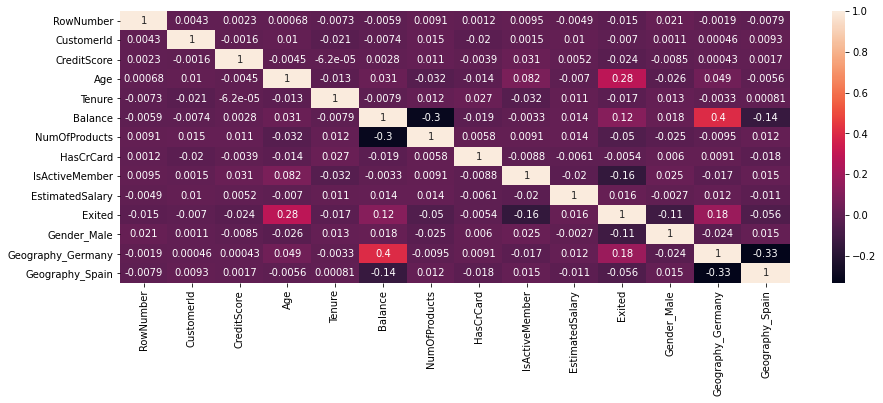

In [64]:
#проверим корреляцию между признаками
correlation = df.corr()
plt.figure(figsize = (15,5))
sns.heatmap(correlation, annot = True)

Критично высоких связей между признаками не наблюдается, поэтому можно оставить модель с изначальным набором признаков.

## Исследование задачи

### Проверка на наличие дисбаланса

Проверим, как часто в целевом признаке встречается класс «1» или «0».

0    0.796062
1    0.203938
Name: Exited, dtype: float64


<AxesSubplot:>

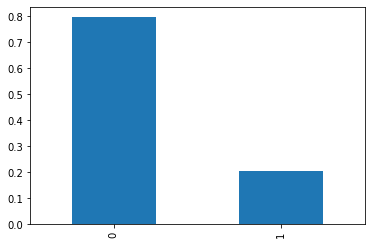

In [65]:
class_frequency = df['Exited'].value_counts(normalize=1)
print(class_frequency)
class_frequency.plot(kind='bar')

Из полученных данных видно, что в целевом признаке наблюдается достаточно сильный дисбаланс классов - только 20% отражают факт ухода клиента.

Кроме того, сравним качество предсказаний с константной моделью. За константу примем пример 0, так как это значение встречается почти в 80% случаев.

In [66]:
target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target, target_pred_constant))

0.7960620393796062


### Проверка моделей без учета дисбаланса.

Обучим несколько моделей без учета дисбаланса, и посмотрим на ключевые метрики - Recall, Precision и F1-score.
Перед этим подберем оптимальные гиперпараметры для моделей на основании метрики F1-score.

Дерево решений

In [77]:
#дерево решений - подберем лучшие гиперпараметры
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
for depth in tqdm(range(1, 16), desc='Progress: '):
    for leaf in range(2,31):
        for sample in range(2,15):
            model_tree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, min_samples_split=sample, random_state=12345)
            model_tree.fit(features_train, target_train)
            predictions_valid_tree = model_tree.predict(features_valid)
            f1_tree = f1_score(target_valid, predictions_valid_tree)
            if f1_tree > best_f1_dt:
                best_model_dt = model_tree
                best_depth_dt = depth
                best_f1_dt = f1_tree
print('Оптимальная глубина дерева =', best_depth_dt) 
print('Качество модели - ',  best_f1_dt)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')            

Progress: 100%|██████████| 15/15 [01:04<00:00,  4.30s/it]

Оптимальная глубина дерева = 7
Качество модели -  0.5779967159277504
Время выполнения кода =  4.696846008300781e-05 сек.


In [132]:
# обучаем модель с оптимальными значениями гиперпараметров
best_model_dt.fit(features_train, target_train)
predictions_valid_tree = best_model_dt.predict(features_valid)

In [133]:
print("Accuracy_tree:", accuracy_score(target_valid, predictions_valid_tree))
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

Accuracy_tree: 0.7711771177117712
Recall_tree: 0.7547169811320755
Precision_tree: 0.4628099173553719
F1_tree: 0.5737704918032787


Случайный лес

In [82]:
# случайный лес - подберем лучшие гиперпараметры
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
for est in tqdm(range(1, 1001, 100), desc='Progress: '):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, n_jobs=-1)
        model_forest.fit(features_train, target_train)
        prediction_valid_rf = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, prediction_valid_rf)
        if f1_forest > best_f1_rf:
            best_model_rf = model_forest
            best_est_rf = est
            best_depth_rf = depth
            best_f1_rf = f1_forest

print('Оптимальное количество оценок =', best_est_rf)
print('Оптимальная глубина дерева =', best_depth_rf)
print('Качество модели - ', best_f1_rf)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')

Progress: 100%|██████████| 10/10 [04:12<00:00, 25.28s/it]

Оптимальное количество оценок = 201
Оптимальная глубина дерева = 13
Качество модели -  0.5803108808290155
Время выполнения кода =  3.24249267578125e-05 сек.


In [83]:
# обучаем модель с оптимальными значениями гиперпараметров
best_model_rf.fit(features_train, target_train)
predictions_valid_rf = best_model_rf.predict(features_valid)

In [134]:
print("Accuracy_forest:", accuracy_score(target_valid, predictions_valid_rf))
print("Recall_forest:", recall_score(target_valid, predictions_valid_rf))
print("Precision_forest:", precision_score(target_valid, predictions_valid_rf))
print("F1_forest:", f1_score(target_valid, predictions_valid_rf))

Accuracy_forest: 0.8426842684268426
Recall_forest: 0.6145552560646901
Precision_forest: 0.6145552560646901
F1_forest: 0.6145552560646901


Логистическая регрессия

In [135]:
# логистическая регрессия - подберем лучшие гиперпараметры
#model_log = LogisticRegression(random_state=12345,
                               solver='lbfgs')
# обучаем модель на тренировочной выборке
#model_log.fit(features_train, target_train)
# получаем предсказания на валидационной выборке
#predictions_valid_log = model_log.predict(features_valid)

#start_time = time.time()
#print('Время выполнения кода = ', (time.time() - start_time), 'сек.')

Время выполнения кода =  9.965896606445312e-05 сек.


In [136]:
#print("Accuracy_log:", accuracy_score(target_valid, predictions_valid_log))
#print("Recall_log:", recall_score(target_valid, predictions_valid_log))
#print("Precision_log:", precision_score(target_valid, predictions_valid_log))
#print("F1_log:", f1_score(target_valid, predictions_valid_log))

Accuracy_log: 0.8058305830583058
Recall_log: 0.18328840970350405
Precision_log: 0.576271186440678
F1_log: 0.278118609406953


Оценим модели по качеству - F1-score.

Дерево решений

Качество модели = 0.577

Случайный лес

Качество модели = 0.580

Логистическая регрессия

Качество модели = 0.278

Таким образом, обучив модели без учета дисбаланса классов, наилучшее значение метрики F1-score демонстрирует модель Случайный лес.

Далее, посмотрим на то, как выглядит дисбаланс классов для 3 обученных моделей.

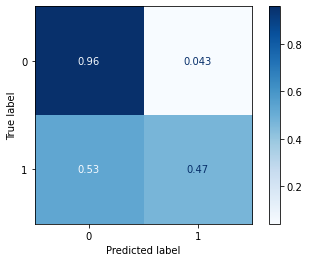

In [87]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
plot_confusion_matrix(estimator=model_tree, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')
None

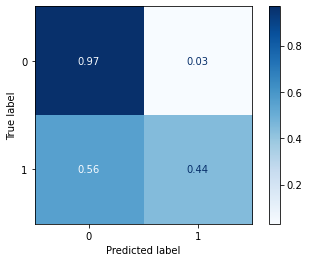

In [88]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN 
plot_confusion_matrix(estimator=model_forest, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')

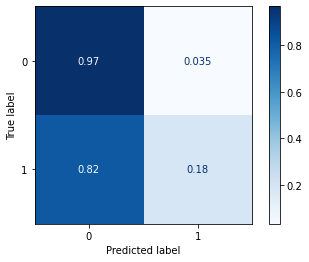

In [89]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN 
plot_confusion_matrix(estimator=model_log, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')
None

Матрицы ошибок наглядно демонстрируют, что для всех трех моделей наблюдается остаточно сильный дисбаланс классов.

Для моделей Дерево решений и Случайный лес ситуация схожая - факт того, что клиент не ушел (0), модели определяют правильно примерно в 96% случаев, в то время как результат предсказаний по факту ухода (1) в среднем всего 45%.

## Борьба с дисбалансом

Рассмотрим 3 метода борьбы с дисбалансом классов:

Взвешивание классов

Увеличение выборки (upsampling)

Уменьшение выборки (downsampling)

### Взвешивание классов

Дерево решений

In [91]:
#дерево решений - подберем лучшие гиперпараметры
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
for depth in tqdm(range(1, 16), desc='Progress: '):
    for leaf in range(2,31):
        for sample in range(2,15):
            model_tree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, min_samples_split=sample, random_state=12345,class_weight='balanced' )
            model_tree.fit(features_train, target_train)
            predictions_valid_tree = model_tree.predict(features_valid)
            f1_tree = f1_score(target_valid, predictions_valid_tree)
            if f1_tree > best_f1_dt:
                best_model_dt = model_tree
                best_depth_dt = depth
                best_f1_dt = f1_tree
print('Оптимальная глубина дерева =', best_depth_dt) 
print('Качество модели - ',  best_f1_dt)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')            

Progress: 100%|██████████| 15/15 [01:14<00:00,  4.97s/it]

Оптимальная глубина дерева = 7
Качество модели -  0.5737704918032787
Время выполнения кода =  3.123283386230469e-05 сек.


In [92]:
# обучаем модель с оптимальными значениями гиперпараметров
best_model_dt.fit(features_train, target_train)
predictions_valid_tree = best_model_dt.predict(features_valid)

In [93]:
print("Accuracy_tree:", accuracy_score(target_valid, predictions_valid_tree))
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

Accuracy_tree: 0.7711771177117712
Recall_tree: 0.7547169811320755
Precision_tree: 0.4628099173553719
F1_tree: 0.5737704918032787


Случайный лес

In [120]:
# случайный лес - подберем лучшие гиперпараметры
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
for est in tqdm(range(1, 1001, 100), desc='Progress: '):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, n_jobs=-1, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        prediction_valid_rf = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, prediction_valid_rf)
        if f1_forest > best_f1_rf:
            best_model_rf = model_forest
            best_est_rf = est
            best_depth_rf = depth
            best_f1_rf = f1_forest

best_model_rfw =  best_model_rf #сохраним эту модель для тестирования на тестовой выборке
print('Оптимальное количество оценок =', best_est_rf)
print('Оптимальная глубина дерева =', best_depth_rf)
print('Качество модели - ', best_f1_rf)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')

Progress: 100%|██████████| 10/10 [04:15<00:00, 25.51s/it]

Оптимальное количество оценок = 901
Оптимальная глубина дерева = 10
Качество модели -  0.6145552560646901
Время выполнения кода =  2.8371810913085938e-05 сек.


In [95]:
# обучаем модель с оптимальными значениями гиперпараметров
best_model_rf.fit(features_train, target_train)
predictions_valid_rf = best_model_rf.predict(features_valid)

In [96]:
print("Accuracy_forest:", accuracy_score(target_valid, predictions_valid_rf))
print("Recall_forest:", recall_score(target_valid, predictions_valid_rf))
print("Precision_forest:", precision_score(target_valid, predictions_valid_rf))
print("F1_forest:", f1_score(target_valid, predictions_valid_rf))

Accuracy_forest: 0.8426842684268426
Recall_forest: 0.6145552560646901
Precision_forest: 0.6145552560646901
F1_forest: 0.6145552560646901


Логистическая регрессия

In [97]:
# логистическая регрессия - подберем лучшие гиперпараметры
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear', class_weight='balanced')
# обучаем модель на тренировочной выборке
model_log.fit(features_train, target_train)
# получаем предсказания на валидационной выборке
predictions_valid_log = model_log.predict(features_valid)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')
print("Accuracy_log:", accuracy_score(target_valid, predictions_valid_log))
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

Время выполнения кода =  7.581710815429688e-05 сек.
Accuracy_log: 0.7079207920792079
Recall_log: 0.6954177897574124
Precision_log: 0.3816568047337278
F1_log: 0.4928366762177651


Видим, что для логистической регрессии взвешивание классов пошло на пользу, F1-мера выросла.
Для модели случайного леса F1-мера тоже немного выросла.

### Уменьшение выборки

In [98]:
# уменьшим выборку в 4 раза, так как положительный класс больше отрицательного в 4 раза
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # fractioning samples
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] +
                                   [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2198, 11)
(2198,)


Дерево решений

In [99]:
#дерево решений - подберем лучшие гиперпараметры
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
for depth in tqdm(range(1, 16), desc='Progress: '):
    for leaf in range(2,31):
        for sample in range(2,15):
            model_tree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, min_samples_split=sample, random_state=12345,class_weight='balanced' )
            model_tree.fit(features_downsampled, target_downsampled)
            predictions_valid_tree = model_tree.predict(features_valid)
            f1_tree = f1_score(target_valid, predictions_valid_tree)
            if f1_tree > best_f1_dt:
                best_model_dt = model_tree
                best_depth_dt = depth
                best_f1_dt = f1_tree
print('Оптимальная глубина дерева =', best_depth_dt) 
print('Качество модели - ',  best_f1_dt)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')     

Progress: 100%|██████████| 15/15 [00:45<00:00,  3.02s/it]

Оптимальная глубина дерева = 7
Качество модели -  0.5651214128035321
Время выполнения кода =  3.0279159545898438e-05 сек.


In [100]:
best_model_dt.fit(features_downsampled, target_downsampled)
predictions_valid_tree = model_tree.predict(features_valid)

print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

Recall_tree: 0.7735849056603774
Precision_tree: 0.4335347432024169
F1_tree: 0.5556631171345596


Случайный лес

In [101]:
# случайный лес - подберем лучшие гиперпараметры
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
for est in tqdm(range(1, 1001, 100), desc='Progress: '):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, n_jobs=-1, class_weight='balanced')
        model_forest.fit(features_downsampled, target_downsampled)
        prediction_valid_rf = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, prediction_valid_rf)
        if f1_forest > best_f1_rf:
            best_model_rf = model_forest
            best_est_rf = est
            best_depth_rf = depth
            best_f1_rf = f1_forest

print('Оптимальное количество оценок =', best_est_rf)
print('Оптимальная глубина дерева =', best_depth_rf)
print('Качество модели - ', best_f1_rf)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')

Progress: 100%|██████████| 10/10 [02:34<00:00, 15.49s/it]

Оптимальное количество оценок = 401
Оптимальная глубина дерева = 8
Качество модели -  0.5917686318131257
Время выполнения кода =  4.291534423828125e-05 сек.


In [108]:
best_model_rf.fit(features_downsampled, target_downsampled)
predictions_valid_forest = model_forest.predict(features_valid)

print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

Recall_forest: 0.7304582210242587
Precision_forest: 0.479646017699115
F1_forest: 0.579059829059829


Логистическая регрессия

In [109]:
# логистическая регрессия - подберем лучшие гиперпараметры
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear', class_weight='balanced')
# обучаем модель на тренировочной выборке
model_log.fit(features_downsampled, target_downsampled)
# получаем предсказания на валидационной выборке
predictions_valid_log = model_log.predict(features_valid)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')
print("Accuracy_log:", accuracy_score(target_valid, predictions_valid_log))
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

Время выполнения кода =  8.96453857421875e-05 сек.
Accuracy_log: 0.7024202420242024
Recall_log: 0.6846361185983828
Precision_log: 0.3746312684365782
F1_log: 0.48427073403241183


Вывод: уменьшение выборки не помогло увеличить качество моделей, попробуем использовать обратный метод.

### Увеличение выборки

In [110]:
# увеличим выборку в 4 раза, так как отрицательный класс больше положительного в 4 раза
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # сцепляем выборки
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # перемешиваем значения, чтобы они не шли друг за другом 
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(8790, 11)
(8790,)


Дерево решений

In [107]:
#дерево решений - подберем лучшие гиперпараметры
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
for depth in tqdm(range(1, 16), desc='Progress: '):
    for leaf in range(2,31):
        for sample in range(2,15):
            model_tree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, min_samples_split=sample, random_state=12345,class_weight='balanced' )
            model_tree.fit(features_upsampled, target_upsampled)
            predictions_valid_tree = model_tree.predict(features_valid)
            f1_tree = f1_score(target_valid, predictions_valid_tree)
            if f1_tree > best_f1_dt:
                best_model_dt = model_tree
                best_depth_dt = depth
                best_f1_dt = f1_tree
print('Оптимальная глубина дерева =', best_depth_dt) 
print('Качество модели - ',  best_f1_dt)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')     

Progress: 100%|██████████| 15/15 [01:38<00:00,  6.58s/it]

Оптимальная глубина дерева = 7
Качество модели -  0.5737704918032787
Время выполнения кода =  3.123283386230469e-05 сек.


In [111]:
best_model_dt.fit(features_upsampled, target_upsampled)
predictions_valid_tree = model_tree.predict(features_valid)

print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

Recall_tree: 0.7816711590296496
Precision_tree: 0.4420731707317073
F1_tree: 0.5647517039922104


Случайный лес

In [112]:
# случайный лес - подберем лучшие гиперпараметры
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
for est in tqdm(range(1, 1001, 100), desc='Progress: '):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, n_jobs=-1, class_weight='balanced')
        model_forest.fit(features_upsampled, target_upsampled)
        prediction_valid_rf = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, prediction_valid_rf)
        if f1_forest > best_f1_rf:
            best_model_rf = model_forest
            best_est_rf = est
            best_depth_rf = depth
            best_f1_rf = f1_forest

print('Оптимальное количество оценок =', best_est_rf)
print('Оптимальная глубина дерева =', best_depth_rf)
print('Качество модели - ', best_f1_rf)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')

Progress: 100%|██████████| 10/10 [05:46<00:00, 34.61s/it]

Оптимальное количество оценок = 101
Оптимальная глубина дерева = 12
Качество модели -  0.6097240473061761
Время выполнения кода =  7.915496826171875e-05 сек.


In [113]:
best_model_rf.fit(features_upsampled, target_upsampled)
predictions_valid_forest = model_forest.predict(features_valid)

print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

Recall_forest: 0.5768194070080862
Precision_forest: 0.6149425287356322
F1_forest: 0.5952712100139081


Логистическая регрессия

In [114]:
# логистическая регрессия - подберем лучшие гиперпараметры
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear', class_weight='balanced')
# обучаем модель на тренировочной выборке
model_log.fit(features_upsampled, target_upsampled)
# получаем предсказания на валидационной выборке
predictions_valid_log = model_log.predict(features_valid)

start_time = time.time()
print('Время выполнения кода = ', (time.time() - start_time), 'сек.')
print("Accuracy_log:", accuracy_score(target_valid, predictions_valid_log))
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

Время выполнения кода =  8.988380432128906e-05 сек.
Accuracy_log: 0.7095709570957096
Recall_log: 0.6954177897574124
Precision_log: 0.3833580980683507
F1_log: 0.4942528735632184


In [115]:
# для удобства соберем все полученные значения метрики F1-score в один датафрейм

model_name = ['Tree', 'Forest', 'Log']
initial_values = [0.58, 0.58, 0.28]
weighting_values = [0.57, 0.61, 0.49]
down_values = [0.55, 0.58, 0.48]
up_values = [0.56, 0.59, 0.49]

df_metrics = pd.DataFrame({'Model Name': model_name,
                           'Initial': initial_values,
                           'Weighing': weighting_values,
                           'Downsampling': down_values,
                           'Upsampling': up_values })

df_metrics

,Model Name,Initial,Weighing,Downsampling,Upsampling
0,Tree,0.58,0.57,0.55,0.56
1,Forest,0.58,0.61,0.58,0.59
2,Log,0.28,0.49,0.48,0.49


Вывод:

Уменьшение и увеличение выборки позволяют достичь примерно одинаковое значение F1-score.
Наибольшее значение метрики F1-score получено на модели Случайный лес при помощи взвешивания классов, 0,61, и увеличения выборки, 0,59, что соответствует целевому показателю - 0,59. Для тестирования будем использовать эту модель.

## Тестирование модели

Так как модель Случайного леса показала наилучшее значение метрики F1-score, тестирование будем проводить на ней.

In [116]:
#new_features_test = pd.concat([features_test, features_valid], axis=0, ignore_index=True)
#new_target_test = pd.concat([target_test, target_valid], axis=0, ignore_index=True)
#target_train.shape

In [122]:
# проверяем модель с наилучшим значением f1-score
best_model_rfw.fit(features_train, target_train)
predictions_test_forest = best_model_rfw.predict(features_test)

print("Recall_forest:", recall_score(target_test, predictions_test_forest))
print("Precision_forest:", precision_score(target_test, predictions_test_forest))
print("F1_tree:", f1_score(target_test, predictions_test_forest))

probabilities_test = best_model_rfw.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_test, probabilities_one_test))

Recall_forest: 0.6388140161725068
Precision_forest: 0.6236842105263158
F1_tree: 0.6311584553928096
ROC-AUC_forest: 0.8553670086819258


Проверив модель случайного леса на тестовой выборке, получили знчение F1-меры 0,63. Это хороший показатель. ROC-AUC = 0,86, это значение выше F1-меры, что говорит о хорошем качестве модели.   

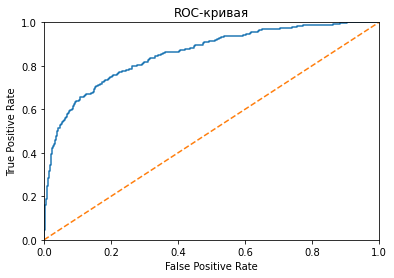

In [124]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Проверим адекватность финальной модели.

In [125]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_test))

In [126]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_test, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, predictions_test_forest))
#Дополнительно сравним AUC-ROC
print('AUC-ROC константой модели:', roc_auc_score(target_test, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, probabilities_one_test))

accuracy_score константой модели: 0.7960417811984607
accuracy_score финальной модели: 0.8477185266630016
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8553670086819258


Финальная модель показывает результаты лучше, чем константная модель — модель можно считать адекватной.

## Финальный вывод

Нам были предоставлены  данные о поведении клиентов и расторжении договоров с банком. Нужно было спрогнозировать, уйдет клиент или нет.  

В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.
Мы разобрали  несколько вариантов борьбы с дисбалансом, в итоге устранили дисбаланс классов в обучающей выборки методом взвешивания. 

На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса:


Recall: 0.6388140161725068

Precision: 0.6236842105263158

F1_score:  0.6311584553928096

ROC-AUC: 0.8553670086819258


Финальная модель также прошла проверку на адекватность в сравнении с контантной моделью: 

accuracy_score константой модели: 0.7960

accuracy_score финальной модели: 0.8477

AUC-ROC константой модели: 0.5

AUC-ROC финальной модели: 0.8553



Таким образом, значения ключевых метрик получились следующие:

F1-score = 0.63 (выше необходимого значения)

AUC-ROC = 0.86 (достаточно близко к единице)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*

In [ ]:
 Ссылка на репозиторий https://github.com/MarySol83/second-project.git